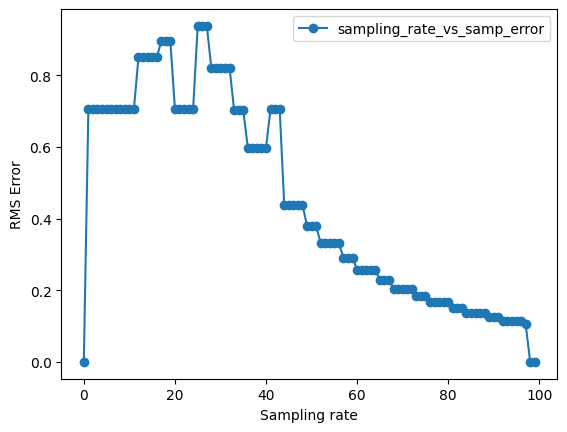

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
def error(fs):  #this function take an input as frequency and outputs rms error
    f=20  #sampling frequency
    l=5/f  #to take only 5 cycle for calculation

    num_samples = round(fs * l)
    if num_samples == 0:
        return 0  # Return 0 for the error if there are no sample points

    t1 = np.linspace(0, l, num_samples)  # For sampling at fs
    s1=np.sin(2*np.pi*f*t1)   

    t2=np.linspace(0,l,500)   
    s2=np.sin(2*np.pi*f*t2)

    s3=np.zeros(500)  #declaring an dummy array
    for i in range(500) :
        s3[i]=np.interp(t2[i], t1, s1)  #linear interpolation 

    diff=s3-s2   #diff is the instanteneous error
    rms_error = np.sqrt(np.mean(diff**2))
    #print('error=',rms_error)
    return rms_error
er = np.zeros(100)
fe = np.arange(2, 100, 1)

for j, freq in enumerate(fe):
    er[j] = error(freq)

fe = np.arange(0, 100, 1)
#for k in range(50):
#    print('Frequency=',fe[k],'error=',er[k])
plt.plot(fe,er,'o-',label='sampling_rate_vs_samp_error')
plt.xlabel("Sampling rate")
plt.ylabel("RMS Error")
plt.legend()


#export in excel
wb = openpyxl.Workbook()
ws = wb.active

ws['A1'] = 'Frequency'
ws['B1'] = 'error'
my_array=np.array([fe, er])

for i in range(100):
    for j in range(2):
        cell = ws.cell(row=i+2, column=j+1)
        cell.value = my_array[j, i]


wb.save('freqVsSampError20.xlsx')